## Importing Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading dataset

In [2]:
df = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

## Handling Null Values

In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Gender']
df['Gender'].isna().sum()

0

In [5]:
df["Self_Employed"].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Self_Employed'].isna().sum()

0

In [6]:
df = df[df['Married'].notna()]

In [7]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)

In [8]:
df['Loan_Amount_Term'].isna().sum()

0

In [9]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

In [10]:
df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

In [11]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'].fillna(value = df['LoanAmount'].mean(), inplace=True)

## Data Visualization

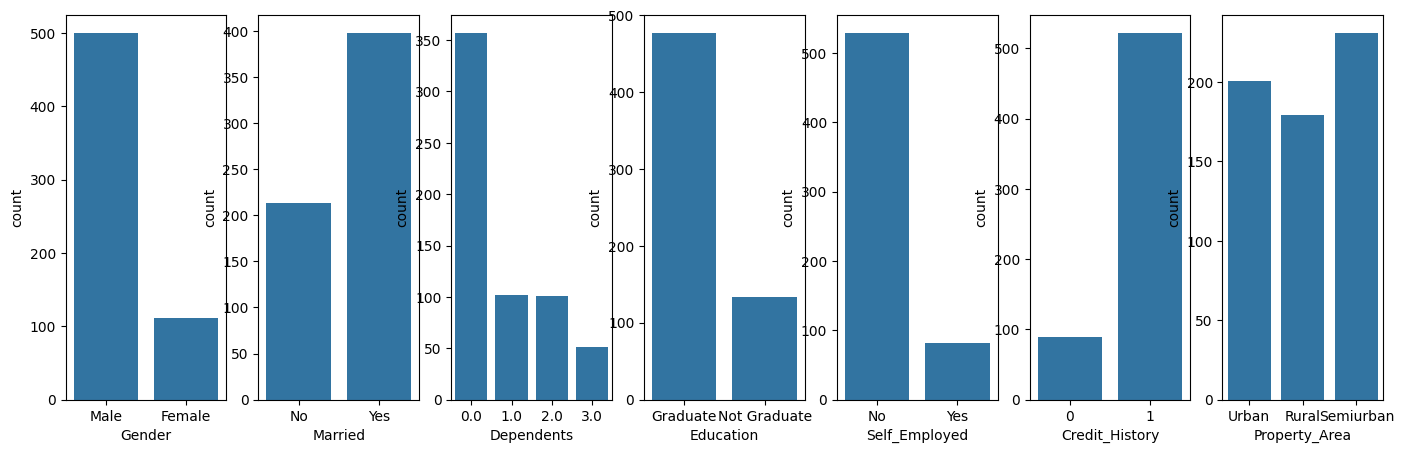

In [12]:
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

fig,axes = plt.subplots(1,7,figsize=(17,5))
for idx,cat_col in enumerate(categorical_columns):
    sns.countplot(x=cat_col,data=df,ax=axes[idx])

plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       611.000000         611.000000  611.000000
mean       5399.513912        1627.970540  146.369492
std        6120.764249        2931.748366   84.240750
min         150.000000           0.000000    9.000000
25%        2875.500000           0.000000  100.000000
50%        3800.000000        1213.000000  128.000000
75%        5790.000000        2304.000000  165.000000
max       81000.000000       41667.000000  700.000000


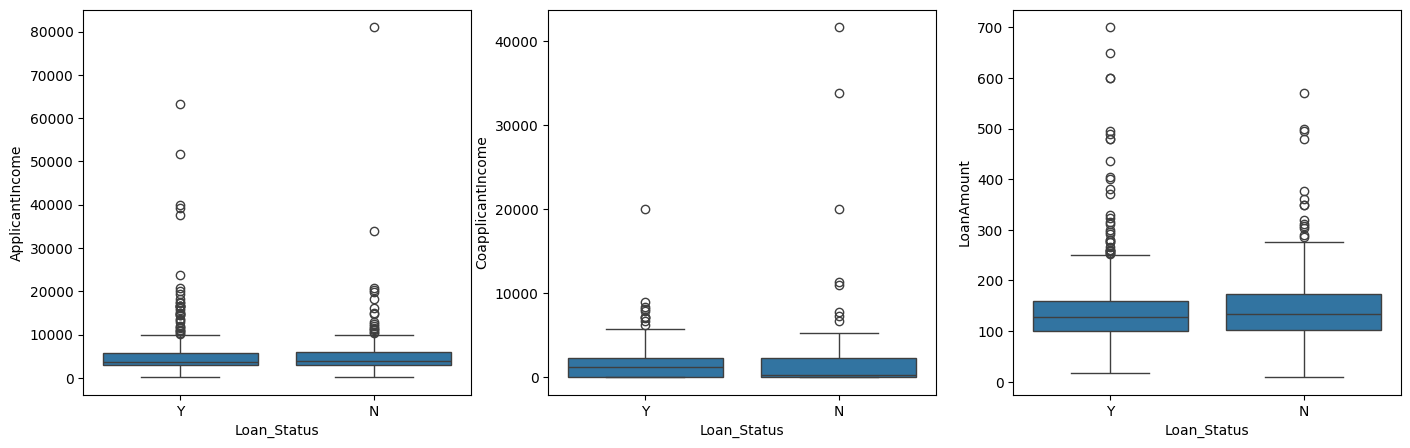

In [13]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

## Finding and Handling Outliers

<Axes: ylabel='ApplicantIncome'>

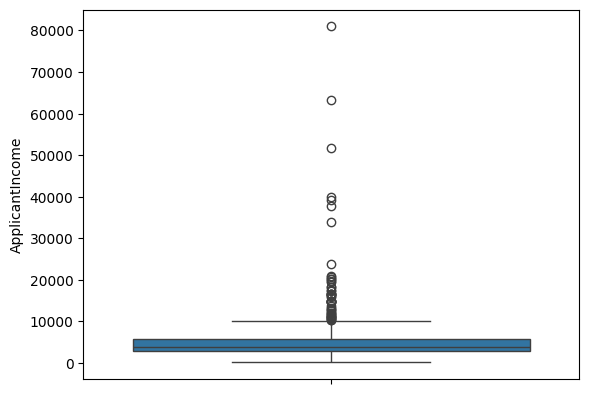

In [14]:
sns.boxplot(df['ApplicantIncome'])

In [15]:
df['ApplicantIncome'].describe()

count      611.000000
mean      5399.513912
std       6120.764249
min        150.000000
25%       2875.500000
50%       3800.000000
75%       5790.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [16]:
out_df = df[df['ApplicantIncome']>=20000].index

In [17]:
df.drop(out_df, inplace=True)

In [18]:
df[df['ApplicantIncome']>=20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


<Axes: ylabel='CoapplicantIncome'>

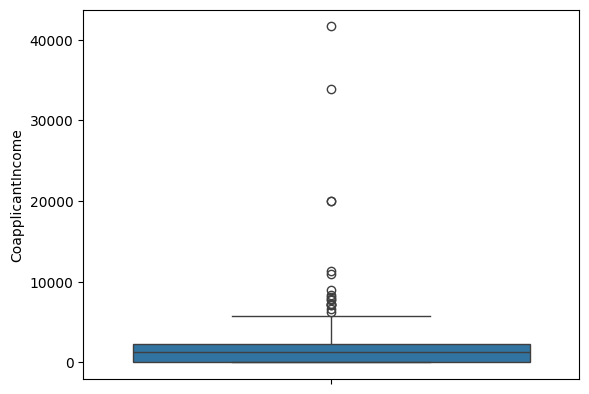

In [19]:
sns.boxplot(df['CoapplicantIncome'])

In [20]:
df['CoapplicantIncome'].describe()

count      599.000000
mean      1641.524207
std       2943.528918
min          0.000000
25%          0.000000
50%       1255.000000
75%       2318.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [21]:
out_df = df[df['CoapplicantIncome']>=7000].index

In [22]:
df.drop(out_df, inplace = True)

In [23]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
# drop irrelevent columns
df.drop(columns = ['Loan_ID'], inplace = True)

In [24]:
df.shape

(584, 12)

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dependents,584.0,0.724315,0.992782,0.0,0.0,0.0,1.00,3.0
ApplicantIncome,584.0,4751.438356,3148.304681,150.0,2874.5,3750.0,5653.50,19730.0
CoapplicantIncome,584.0,1328.308219,1488.503697,0.0,0.0,1128.5,2213.25,6666.0
LoanAmount,584.0,138.171900,67.363390,9.0,100.0,127.5,160.00,600.0
Loan_Amount_Term,584.0,342.842466,63.880268,12.0,360.0,360.0,360.00,480.0
Credit_History,584.0,0.856164,0.351224,0.0,1.0,1.0,1.00,1.0


In [26]:
df['Loan_Status'].value_counts()

Loan_Status
Y    403
N    181
Name: count, dtype: int64

## Handling Unbalanced data

<Axes: xlabel='Loan_Status', ylabel='count'>

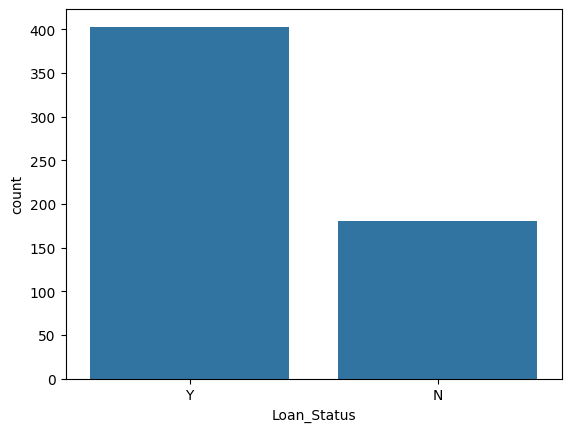

In [27]:
sns.countplot(x = df['Loan_Status'])

In [28]:
from sklearn.utils import resample

df_major = df[(df['Loan_Status']=='Y')]
df_minor = df[(df['Loan_Status']=='N')]

df_minor_upsample = resample(df_minor, replace = True, n_samples = 403, random_state = 42)

df_upsampled = pd.concat([df_minor_upsample, df_major])

<Axes: xlabel='Loan_Status', ylabel='count'>

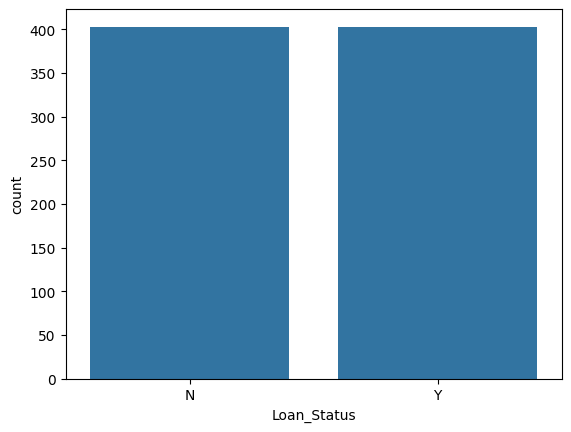

In [29]:
sns.countplot(x = df_upsampled['Loan_Status'])

In [30]:
df_upsampled.duplicated().sum()

248

In [31]:
df_upsampled['Loan_Status'].value_counts()

Loan_Status
N    403
Y    403
Name: count, dtype: int64

In [32]:
df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
357,Male,Yes,1.0,Graduate,No,3875,0,67.000000,360,1,Urban,N
605,Male,Yes,0.0,Not Graduate,No,2400,3800,146.369492,180,1,Urban,N
314,Male,Yes,0.0,Graduate,No,2473,1843,159.000000,360,1,Rural,N
36,Male,Yes,0.0,Graduate,No,1828,1330,100.000000,360,0,Urban,N
366,Male,No,0.0,Graduate,No,2500,0,96.000000,480,1,Semiurban,N


In [ ]:
df_upsampled["Property_Area"].value_counts()

Property_Area
Semiurban    291
Urban        266
Rural        249
Name: count, dtype: int64

In [ ]:
df_upsampled.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encoding Categorical data

In [ ]:
# Importing labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encoding all text data in numerical data using labelencoder by fit_transform

df_upsampled["Gender"] = le.fit_transform(df_upsampled["Gender"])
df_upsampled["Married"] = le.fit_transform(df_upsampled["Married"])
df_upsampled["Education"] = le.fit_transform(df_upsampled["Education"])
df_upsampled["Self_Employed"] = le.fit_transform(df_upsampled["Self_Employed"])
df_upsampled["Property_Area"] = le.fit_transform(df_upsampled["Property_Area"])

df_upsampled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
357,1,1,1.0,0,0,3875,0,67.000000,360,1,2,N
605,1,1,0.0,1,0,2400,3800,146.369492,180,1,2,N
314,1,1,0.0,0,0,2473,1843,159.000000,360,1,0,N
36,1,1,0.0,0,0,1828,1330,100.000000,360,0,2,N
366,1,0,0.0,0,0,2500,0,96.000000,480,1,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0.0,0,0,3232,1950,108.000000,360,1,0,Y
609,0,0,0.0,0,0,2900,0,71.000000,360,1,0,Y
610,1,1,3.0,0,0,4106,0,40.000000,180,1,0,Y
611,1,1,1.0,0,0,8072,240,253.000000,360,1,2,Y


In [ ]:
df_upsampled['Dependents'].value_counts()

Dependents
0.0    486
1.0    127
2.0    126
3.0     67
Name: count, dtype: int64

## Splitting

In [ ]:
x = df_upsampled.drop(['Loan_Status'], axis = 1)
y = df_upsampled['Loan_Status']

In [ ]:
x.shape, y.shape

((806, 11), (806,))

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=True,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

In [ ]:
from sklearn.metrics import f1_score

## Training models

# KNN Classifier

In [ ]:
# importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# fitting training data in KNN model
knn.fit(xtrain,ytrain)

# predicting and giving xtest data to model for testing predictions
pred = knn.predict(xtest)
pred[:5]

array(['N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# checking accuracy of predictions
accuracy_score(ytest,pred)

0.7901234567901234

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(ytest, pred),"\n")
print(classification_report(ytest, pred))

[[61 20]
 [14 67]] 

              precision    recall  f1-score   support

           N       0.81      0.75      0.78        81
           Y       0.77      0.83      0.80        81

    accuracy                           0.79       162
   macro avg       0.79      0.79      0.79       162
weighted avg       0.79      0.79      0.79       162



# KNN with cross validation using GridSearch

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()

for k in range(1,100,2):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(xtrain,ytrain)
  pred = knn.predict(xtest)

  print("k ={},acccuracy={}".format(k,accuracy_score(ytest,pred)))

k =1,acccuracy=0.8888888888888888
k =3,acccuracy=0.8827160493827161
k =5,acccuracy=0.7901234567901234
k =7,acccuracy=0.7407407407407407
k =9,acccuracy=0.7407407407407407
k =11,acccuracy=0.7469135802469136
k =13,acccuracy=0.7592592592592593
k =15,acccuracy=0.808641975308642
k =17,acccuracy=0.8209876543209876
k =19,acccuracy=0.7901234567901234
k =21,acccuracy=0.7777777777777778
k =23,acccuracy=0.7654320987654321
k =25,acccuracy=0.7654320987654321
k =27,acccuracy=0.7716049382716049
k =29,acccuracy=0.7901234567901234
k =31,acccuracy=0.7962962962962963
k =33,acccuracy=0.7839506172839507
k =35,acccuracy=0.7777777777777778
k =37,acccuracy=0.7592592592592593
k =39,acccuracy=0.7592592592592593
k =41,acccuracy=0.7716049382716049
k =43,acccuracy=0.7530864197530864
k =45,acccuracy=0.7283950617283951
k =47,acccuracy=0.7283950617283951
k =49,acccuracy=0.7283950617283951
k =51,acccuracy=0.7530864197530864
k =53,acccuracy=0.7530864197530864
k =55,acccuracy=0.7592592592592593
k =57,acccuracy=0.76543209

In [ ]:
# increasing accuracy
# using gridsearch with cross validation
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_jobs=-1)
param_grid = {
    'n_neighbors':[1],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
    }
gsv = GridSearchCV(knn,param_grid,n_jobs=-1,refit=True,verbose=3)
gsv.fit(xtrain,ytrain)
prediction = gsv.predict(xtest)
print(gsv.best_params_) # this method gives us best combination of parameters which gives high accuracy
print(gsv.best_score_) # this method gives us the best accuracy score
print(accuracy_score(ytest,prediction))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
0.8757994186046514
0.8888888888888888


In [ ]:
print(confusion_matrix(ytest, prediction),"\n")
print(classification_report(ytest, prediction))

[[74  7]
 [11 70]] 

              precision    recall  f1-score   support

           N       0.87      0.91      0.89        81
           Y       0.91      0.86      0.89        81

    accuracy                           0.89       162
   macro avg       0.89      0.89      0.89       162
weighted avg       0.89      0.89      0.89       162



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(xtrain, ytrain)
prediction2 = rfc.predict(xtest)

In [ ]:
print(confusion_matrix(ytest,prediction2))
print(classification_report(ytest,prediction2))

[[75  6]
 [ 5 76]]
              precision    recall  f1-score   support

           N       0.94      0.93      0.93        81
           Y       0.93      0.94      0.93        81

    accuracy                           0.93       162
   macro avg       0.93      0.93      0.93       162
weighted avg       0.93      0.93      0.93       162



# SVC - Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel= "sigmoid")
svc_model.fit(xtrain, ytrain)
prediction3 = svc_model.predict(xtest)

In [ ]:
print(confusion_matrix(ytest,prediction3))
print(classification_report(ytest,prediction3))

[[44 37]
 [13 68]]
              precision    recall  f1-score   support

           N       0.77      0.54      0.64        81
           Y       0.65      0.84      0.73        81

    accuracy                           0.69       162
   macro avg       0.71      0.69      0.68       162
weighted avg       0.71      0.69      0.68       162



# Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
prediction4 = logreg.predict(xtest)

In [ ]:
print(confusion_matrix(ytest,prediction4))
print(classification_report(ytest,prediction4))

[[49 32]
 [ 5 76]]
              precision    recall  f1-score   support

           N       0.91      0.60      0.73        81
           Y       0.70      0.94      0.80        81

    accuracy                           0.77       162
   macro avg       0.81      0.77      0.77       162
weighted avg       0.81      0.77      0.77       162



In [ ]:
df_upsampled.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')